# statistics

## repeated measures ANOVA

In [2]:
from measures import get_measures

df = get_measures()

Reading data from data/measures.csv


In [3]:
from stats import rm_anova
from plot_brain import plot_brain_masked

df_stats = rm_anova(df)
df_stats_ecc = df_stats[df_stats.measure == 'eccentricity']

In [4]:
df_stats_ecc

,region,measure,F,pvalue,fdr_significant,pvalue_corrected
0,7Networks_LH_Cont_Cing_1,eccentricity,1.442411,0.241890,False,0.528241
1,7Networks_LH_Cont_Cing_2,eccentricity,0.450867,0.638539,False,0.814426
2,7Networks_LH_Cont_Cing_3,eccentricity,0.020027,0.980177,False,0.990522
3,7Networks_LH_Cont_Cing_4,eccentricity,0.169524,0.844342,False,0.916924
4,7Networks_LH_Cont_Cing_5,eccentricity,1.519305,0.224549,False,0.508162
...,...,...,...,...,...,...
993,7Networks_RH_Vis_79,eccentricity,3.355135,0.039425,False,0.213259
994,7Networks_RH_Vis_8,eccentricity,2.811660,0.065515,False,0.277050
995,7Networks_RH_Vis_80,eccentricity,0.118441,0.888446,False,0.942810
996,7Networks_RH_Vis_81,eccentricity,0.651528,0.523745,False,0.743695


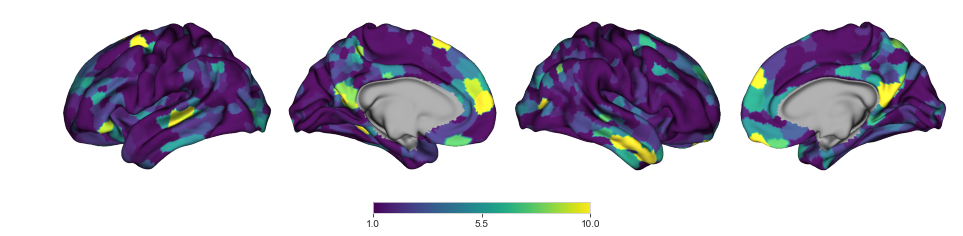

In [5]:
from plot_brain import plot_brain, plot_brain_masked

plot_brain(df_stats_ecc, 'F', color_range=(1, 10))

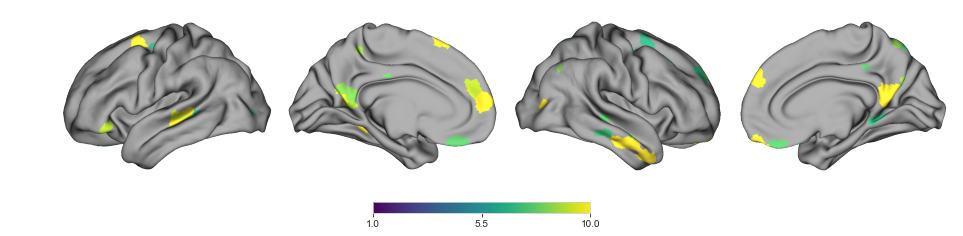

In [6]:
plot_brain_masked(df_stats_ecc, 'F', 'pvalue_corrected', color_range=(1, 10))

In [7]:
# think of multilevel anova. each region has four values.

In [8]:
# loosen the FDR criteria

In [9]:
df_stats_ecc.fdr_significant.sum()

51

In [10]:
df_stats_ecc[df_stats_ecc.fdr_significant == True].region.tolist()

['7Networks_LH_Cont_Cing_8',
 '7Networks_LH_Default_PFC_19',
 '7Networks_LH_Default_PFC_27',
 '7Networks_LH_Default_PFC_46',
 '7Networks_LH_Default_PFC_8',
 '7Networks_LH_Default_Temp_13',
 '7Networks_LH_Default_Temp_17',
 '7Networks_LH_Default_Temp_18',
 '7Networks_LH_Default_Temp_19',
 '7Networks_LH_Default_Temp_21',
 '7Networks_LH_Default_pCunPCC_1',
 '7Networks_LH_Default_pCunPCC_10',
 '7Networks_LH_Default_pCunPCC_2',
 '7Networks_LH_Default_pCunPCC_3',
 '7Networks_LH_Default_pCunPCC_4',
 '7Networks_LH_Default_pCunPCC_5',
 '7Networks_LH_Default_pCunPCC_7',
 '7Networks_LH_DorsAttn_FEF_5',
 '7Networks_LH_DorsAttn_FEF_6',
 '7Networks_LH_Limbic_OFC_4',
 '7Networks_LH_Limbic_OFC_9',
 '7Networks_LH_SalVentAttn_Med_13',
 '7Networks_LH_Vis_34',
 '7Networks_LH_Vis_5',
 '7Networks_RH_Cont_PFCl_28',
 '7Networks_RH_Cont_PFCl_34',
 '7Networks_RH_Cont_pCun_2',
 '7Networks_RH_Default_PFCdPFCm_13',
 '7Networks_RH_Default_PFCdPFCm_14',
 '7Networks_RH_Default_Par_14',
 '7Networks_RH_Default_Temp_1',

## pairwise t-tests

In [11]:
from stats import pairwise_ttests

df_stats_pairwise = pairwise_ttests(df)
df_stats_pairwise

region     tstat  \
measure      A        B                                           
eccentricity baseline early  7Networks_LH_Cont_Cing_1 -1.114352   
                      early  7Networks_LH_Cont_Cing_2  0.431321   
                      early  7Networks_LH_Cont_Cing_3  0.136411   
                      early  7Networks_LH_Cont_Cing_4 -0.002800   
                      early  7Networks_LH_Cont_Cing_5 -1.339883   
...                                               ...       ...   
gradient4    early    late        7Networks_RH_Vis_79  0.525043   
                      late         7Networks_RH_Vis_8  0.489644   
                      late        7Networks_RH_Vis_80  0.705840   
                      late        7Networks_RH_Vis_81  0.885883   
                      late         7Networks_RH_Vis_9  0.447303   

                             pvalue_corrected  
measure      A        B                        
eccentricity baseline early          0.402244  
                      early          0.695323  
                      early          0.971872  
                      early          0.997772  
                      early          0.406150  
...                                       ...  
gradient4    early    late           0.600873  
                      late           0.758587  
                      late           0.482152  
                      late           0.567142  
                      late           0.885946  

[14970 rows x 3 columns]

In [12]:
from plot_brain import plot_brain

df_contrast = df_stats_pairwise.loc['eccentricity', 'early', 'late']

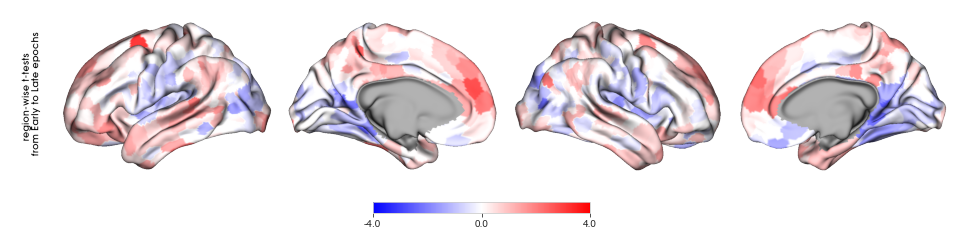

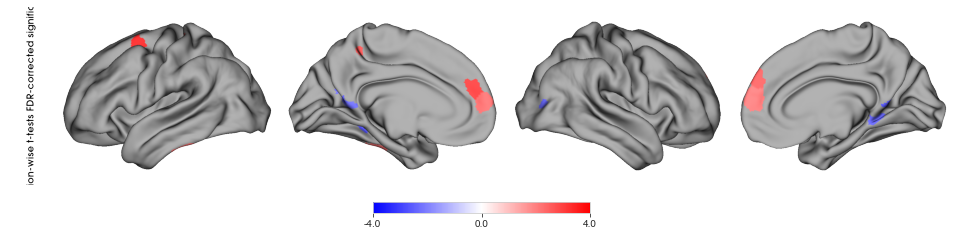

In [13]:
plot_brain(df_contrast, 'tstat',
           text='region-wise t-tests \n from Early to Late epochs',
           color_range=(-4, 4), color_map='bwr')

plot_brain_masked(df_contrast, 'tstat', 'pvalue_corrected',
                  text='region-wise t-tests FDR-corrected significant',
                  color_range=(-4, 4), color_map='bwr')

In [14]:
df_contrast[df_contrast.pvalue_corrected < 0.05]

region     tstat  \
measure      A     B                                                       
eccentricity early late            7Networks_LH_Default_PFC_19  2.340735   
                   late            7Networks_LH_Default_PFC_27  3.035576   
                   late         7Networks_LH_Default_pCunPCC_1 -2.514611   
                   late         7Networks_LH_Default_pCunPCC_2 -2.300900   
                   late         7Networks_LH_Default_pCunPCC_4 -2.574790   
                   late         7Networks_LH_Default_pCunPCC_7 -2.349218   
                   late            7Networks_LH_DorsAttn_FEF_5  3.406639   
                   late        7Networks_LH_Limbic_TempPole_11  2.327458   
                   late        7Networks_LH_SalVentAttn_Med_13  2.756909   
                   late                 7Networks_LH_SomMot_66  2.384412   
                   late                     7Networks_LH_Vis_5 -2.758529   
                   late       7Networks_RH_Default_PFCdPFCm_13  2.585327   
                   late        7Networks_RH_Default_PFCdPFCm_8  2.186415   
                   late         7Networks_RH_Default_pCunPCC_2 -2.722446   
                   late         7Networks_RH_Default_pCunPCC_4 -2.447732   
                   late  7Networks_RH_SalVentAttn_FrOperIns_14 -2.596754   
                   late                    7Networks_RH_Vis_31 -2.512510   
                   late                    7Networks_RH_Vis_52 -2.494923   

                         pvalue_corrected  plot_value  
measure      A     B                                   
eccentricity early late          0.032260    2.340735  
                   late          0.006157    3.035576  
                   late          0.020601   -2.514611  
                   late          0.035641   -2.300900  
                   late          0.017551   -2.574790  
                   late          0.031577   -2.349218  
                   late          0.002980    3.406639  
                   late          0.033354    2.327458  
                   late          0.010641    2.756909  
                   late          0.028882    2.384412  
                   late          0.010592   -2.758529  
                   late          0.017061    2.585327  
                   late          0.047763    2.186415  
                   late          0.011718   -2.722446  
                   late          0.024543   -2.447732  
                   late          0.033086   -2.596754  
                   late          0.041431   -2.512510  
                   late          0.021698   -2.494923

In [15]:
# these areas show expansion vs contraction